# 📊 Visualizing Popular Dataset with Matplotlib

In [21]:
# Import the seaborn library for statistical data visualization
import seaborn as sns

# Import the matplotlib library to access version info and general plotting tools
import matplotlib

# Print the current version of seaborn to ensure compatibility and debugging
print("Seaborn version:", sns.__version__)

# Print the current version of matplotlib to ensure compatibility and debugging
print("Matplotlib version:", matplotlib.__version__)

Seaborn version: 0.12.2
Matplotlib version: 3.5.3


In [23]:
# Import seaborn for advanced statistical plotting (built on top of matplotlib)
import seaborn as sns

# Import pandas for data manipulation and analysis
import pandas as pd

# Import matplotlib's pyplot interface for creating visualizations
import matplotlib.pyplot as plt

# Import numpy for numerical operations (e.g., working with arrays, linspace, etc.)
import numpy as np

# This Jupyter magic command ensures that matplotlib plots are displayed inline
# directly below the code cell that produces them
%matplotlib inline

## Load Titanic Dataset

In [24]:
# Load the built-in Titanic dataset from Seaborn
# This dataset contains information about Titanic passengers such as age, class, fare, survival status, etc.
titanic = sns.load_dataset('titanic')

# Display the first five rows of the dataset to quickly preview its structure and values
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Pie Chart: Gender Distribution

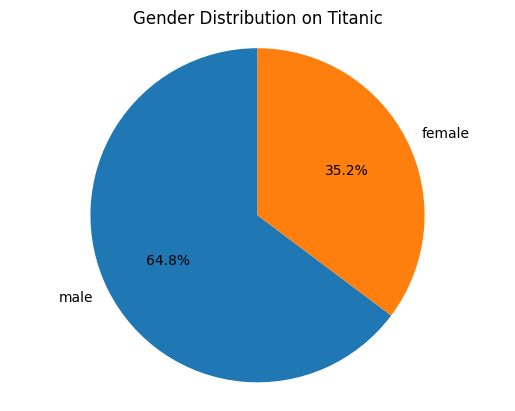

In [25]:
# Count the number of passengers by gender (male/female) using value_counts()
gender_counts = titanic['sex'].value_counts()

# Create a pie chart to visualize the gender distribution
# - labels: category names (male/female)
# - autopct: show percentage values with 1 decimal place
# - startangle: rotate the start of the pie chart for better layout
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title to the chart
plt.title('Gender Distribution on Titanic')

# Ensure the pie chart is a circle (equal aspect ratio)
plt.axis('equal')

# Display the plot
plt.show()

## Stacked Bar Chart: Passenger Class by Gender

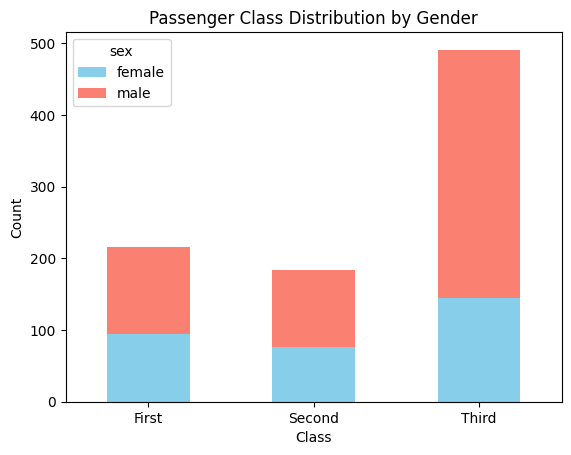

In [26]:
# Create a cross-tabulation table (pivot table) that shows the count of passengers
# grouped by class (First, Second, Third) and gender (male/female)
crosstab = pd.crosstab(titanic['class'], titanic['sex'])

# Plot a stacked bar chart from the cross-tabulated data
# - kind='bar': create a vertical bar chart
# - stacked=True: stack male and female bars on top of each other
# - color: assign custom colors to each gender
crosstab.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])

# Add a title to the chart
plt.title('Passenger Class Distribution by Gender')

# Label the x-axis and y-axis
plt.xlabel('Class')
plt.ylabel('Count')

# Set x-axis tick labels horizontal for better readability
plt.xticks(rotation=0)

# Display the plot
plt.show()

## Area Chart: Survival by Age

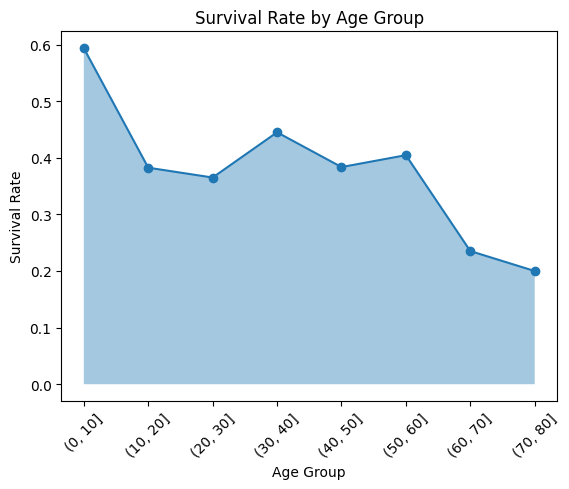

In [27]:
# Select only the 'age' and 'survived' columns, and drop rows with missing values
# This ensures accurate analysis without NaN values interfering
age_survival = titanic[['age', 'survived']].dropna()

# Create age bins in 10-year intervals (0–10, 10–20, ..., 80–90)
# pd.cut is used to segment ages into discrete intervals
age_bins = pd.cut(age_survival['age'], bins=np.arange(0, 90, 10))

# Group the data by age bins and calculate the average survival rate in each group
# This gives the proportion of passengers who survived in each age group
area_data = age_survival.groupby(age_bins)['survived'].mean()

# Fill the area under the survival rate curve for visual effect
# Convert age bin intervals to string for plotting on the x-axis
plt.fill_between(area_data.index.astype(str), area_data, alpha=0.4)

# Overlay a line plot with markers on top of the filled area
plt.plot(area_data.index.astype(str), area_data, marker='o')

# Add plot title and axis labels
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

## Heatmap: Correlation Matrix

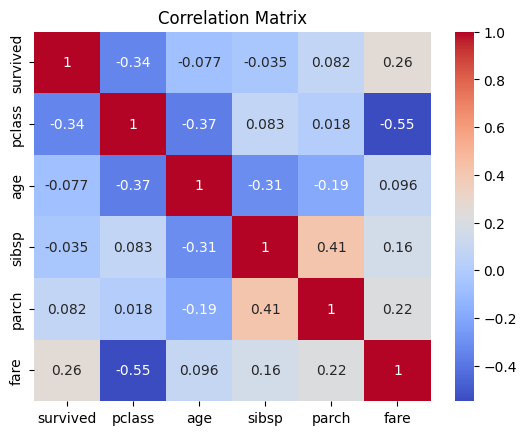

In [29]:
# Import seaborn for statistical plotting
import seaborn as sns

# Import matplotlib for additional plotting tools
import matplotlib.pyplot as plt

# Select only the numeric columns from the Titanic dataset
# This avoids errors when calculating correlation (which only applies to numerical data)
numeric_titanic = titanic.select_dtypes(include=['number'])

# Compute the correlation matrix for the numeric columns
# This measures the linear relationship between pairs of variables (e.g., age vs. fare)
corr = numeric_titanic.corr()

# Plot a heatmap to visualize the correlation matrix
# - annot=True: display the actual correlation coefficients in each cell
# - cmap='coolwarm': use a diverging colormap for easier interpretation (blue to red)
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Add a title to the heatmap
plt.title('Correlation Matrix')

# Show the heatmap
plt.show()

## Contour Plot: Simulated Data (No Contour in Titanic)

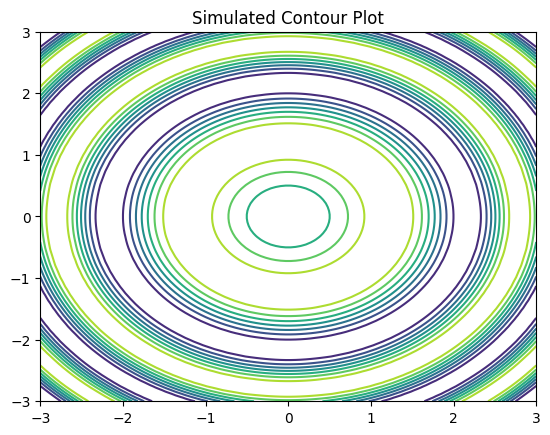

In [30]:
# Generate 100 evenly spaced values from -3.0 to 3.0 for both x and y axes
x = np.linspace(-3.0, 3.0, 100)
y = np.linspace(-3.0, 3.0, 100)

# Create a 2D grid of x and y values using meshgrid
# X and Y will now represent coordinate matrices for vectorized evaluations
X, Y = np.meshgrid(x, y)

# Calculate Z values using the function Z = sin(X^2 + Y^2)
# This produces a smooth, wave-like surface based on radial distance
Z = np.sin(X**2 + Y**2)

# Create a contour plot (2D representation of 3D surface)
# Lines represent constant Z values (similar to topographic maps)
plt.contour(X, Y, Z)

# Add a title to the plot
plt.title('Simulated Contour Plot')

# Display the plot
plt.show()

## Box Plot: Fare Distribution by Class

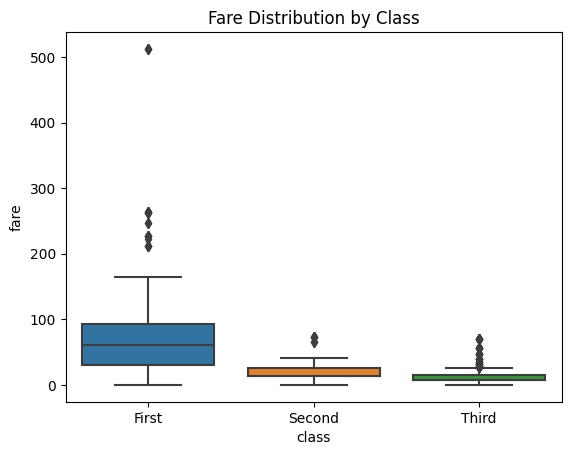

In [31]:
# Create a box plot to visualize the distribution of 'fare' for each passenger class
# - x='class': passenger classes (First, Second, Third) on the x-axis
# - y='fare': fare values on the y-axis
# Each box shows the median, interquartile range, and potential outliers
sns.boxplot(data=titanic, x='class', y='fare')

# Add a title to describe the plot
plt.title('Fare Distribution by Class')

# Display the plot
plt.show()

## Polar Plot: Simulated Sine Wave

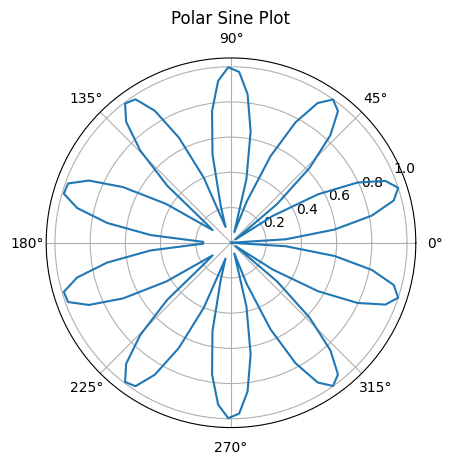

In [32]:
# Generate 100 angle values evenly spaced from 0 to 2π radians (a full circle)
theta = np.linspace(0, 2 * np.pi, 100)

# Compute the radius for each angle using the absolute value of sin(5 * theta)
# This creates a flower-like pattern with 5 "petals" due to the 5θ frequency
r = np.abs(np.sin(5 * theta))

# Create a polar plot using theta (angle) and r (radius)
# The plot is drawn in circular coordinates instead of Cartesian (x, y)
plt.polar(theta, r)

# Add a title to describe the plot
plt.title('Polar Sine Plot')

# Display the plot
plt.show()

## Error Bars: Simulated Values

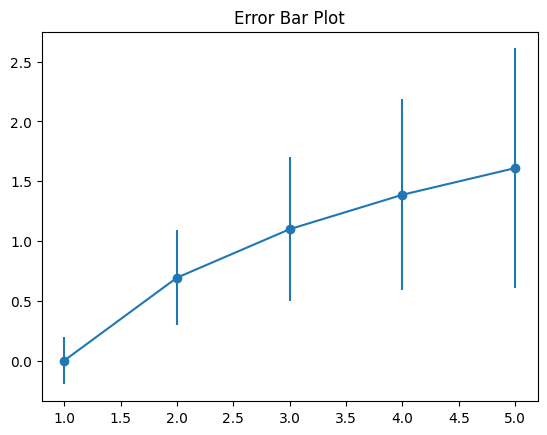

In [33]:
# Create an array of x values from 1 to 5
x = np.arange(1, 6)

# Compute the natural logarithm of each x value to get y values
y = np.log(x)

# Define error margins for each y value as 20% of the corresponding x value
error = 0.2 * x

# Plot the data with vertical error bars
# - x and y define the data points
# - yerr=error specifies the vertical error margins
# - fmt='-o' means use a solid line ('-') with circle markers ('o')
plt.errorbar(x, y, yerr=error, fmt='-o')

# Add a title to the plot
plt.title('Error Bar Plot')

# Display the plot
plt.show()

## Stem Plot: Count of Ages

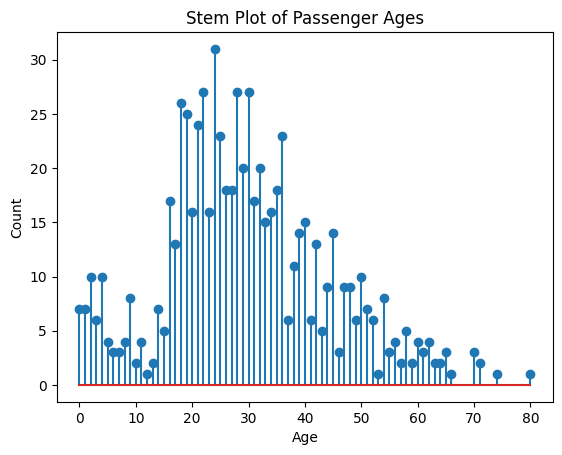

In [34]:
# Drop missing values from the 'age' column and convert remaining ages to integers
ages = titanic['age'].dropna().astype(int)

# Count the number of passengers for each age and sort by age
counts = ages.value_counts().sort_index()

# Create a stem plot to show frequency of each age
# - counts.index: distinct ages
# - counts.values: number of passengers at each age
# - use_line_collection=True: improves performance with many lines
plt.stem(counts.index, counts.values, use_line_collection=True)

# Add plot title and axis labels
plt.title('Stem Plot of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Count')

# Display the plot
plt.show()

## Log-Scale Plot: Fare Distribution

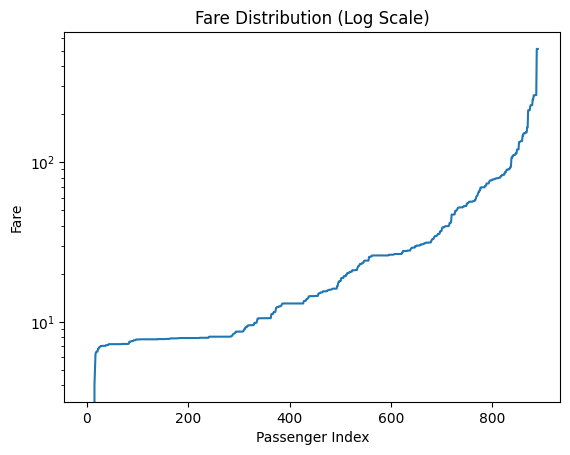

In [35]:
# Sort the 'fare' values in ascending order and reset the index
# This helps to visualize how fares increase across all passengers
fare_sorted = titanic['fare'].sort_values().reset_index(drop=True)

# Plot the sorted fare values as a line plot
plt.plot(fare_sorted)

# Set the y-axis to a logarithmic scale to handle large differences in fare values
# This makes the distribution easier to interpret, especially when fares vary widely
plt.yscale('log')

# Add title and axis labels
plt.title('Fare Distribution (Log Scale)')
plt.xlabel('Passenger Index')
plt.ylabel('Fare')

# Display the plot
plt.show()

## Histogram of Passenger Ages

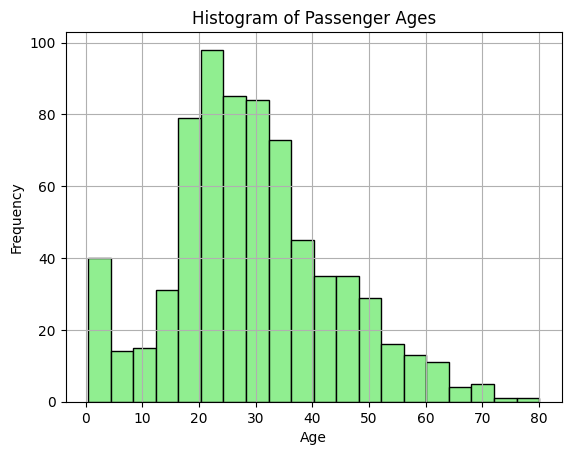

In [37]:
# Plot a histogram of passenger ages
# This helps us understand the age distribution of Titanic passengers

plt.hist(titanic['age'].dropna(),  # drop missing values
         bins=20,                  # number of bins in histogram
         color='lightgreen',       # bar color
         edgecolor='black')        # outline each bar

plt.title('Histogram of Passenger Ages')     # add a title
plt.xlabel('Age')                            # label for x-axis
plt.ylabel('Frequency')                      # label for y-axis
plt.grid(True)                               # add background gridlines

plt.show()                                   # display the plot

## Stacked Bar Plot: Survival Count Split by Gender

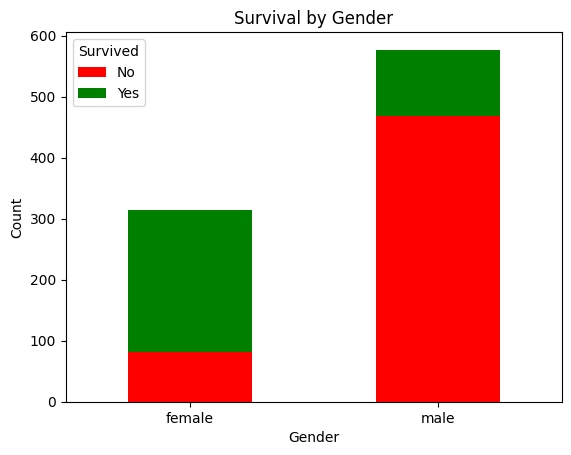

In [38]:
# Create a crosstab of survival status by gender
# This summarizes how many males and females survived or did not

survival_gender = pd.crosstab(titanic['sex'], titanic['survived'])

# Plot the crosstab as a stacked bar chart
survival_gender.plot(kind='bar',                     # bar chart
                     stacked=True,                   # stack bars on top
                     color=['red', 'green'])          # red for not survived, green for survived

plt.title('Survival by Gender')                      # chart title
plt.xlabel('Gender')                                 # x-axis label
plt.ylabel('Count')                                  # y-axis label
plt.legend(title='Survived', labels=['No', 'Yes'])   # legend with labels
plt.xticks(rotation=0)                               # keep x-axis labels horizontal

plt.show()                                           # display the chart

## Donut-Style Pie Chart: Passenger Class Distribution

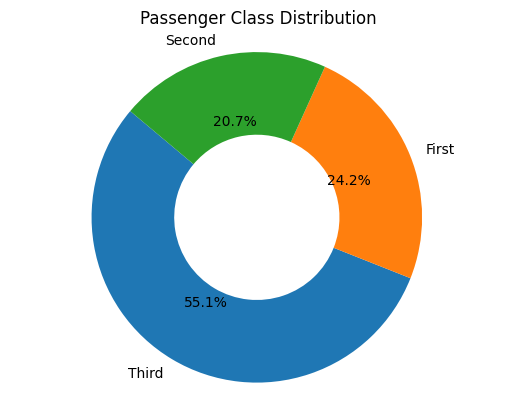

In [39]:
# Create value counts of passenger classes (First, Second, Third)
class_counts = titanic['class'].value_counts()

# Create a donut-style pie chart to visualize passenger class distribution
plt.pie(class_counts,                             # input values
        labels=class_counts.index,                # class labels
        autopct='%1.1f%%',                         # display percentage on chart
        startangle=140,                            # rotate start
        wedgeprops=dict(width=0.5))                # reduce width for "donut" effect

plt.title('Passenger Class Distribution')          # chart title
plt.axis('equal')                                  # equal aspect ratio for a perfect circle
plt.show()                                         # display the plot

## Violin Plot: Age Distribution by Survival

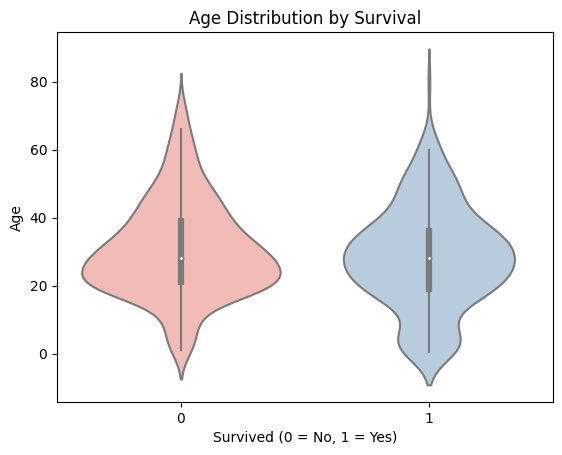

In [40]:
# A violin plot combines box plot and KDE to show age distributions
# We'll compare age distribution of survived vs not-survived passengers

sns.violinplot(data=titanic,
               x='survived',      # 0 = no, 1 = yes
               y='age',
               palette='Pastel1') # soft color palette

plt.title('Age Distribution by Survival')          # chart title
plt.xlabel('Survived (0 = No, 1 = Yes)')            # x-axis label
plt.ylabel('Age')                                   # y-axis label
plt.show()                                          # display the plot

## Horizontal Bar Plot: Passengers by Embarkation Port

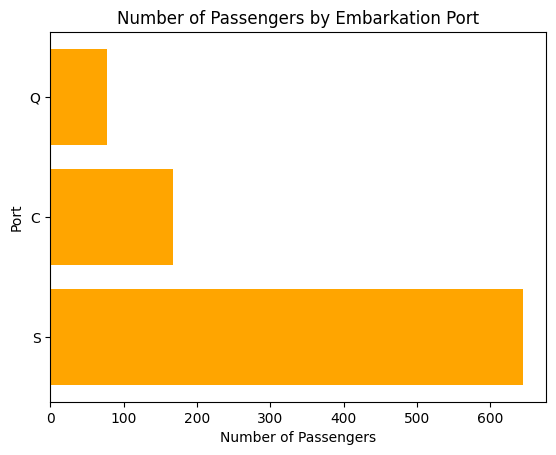

In [41]:
# Count how many passengers boarded from each port (C = Cherbourg, Q = Queenstown, S = Southampton)
embarked_counts = titanic['embarked'].value_counts()

# Plot horizontal bar chart to compare embarkation ports
plt.barh(embarked_counts.index,                    # y-axis: port labels
         embarked_counts.values,                   # x-axis: counts
         color='orange')                           # bar color

plt.title('Number of Passengers by Embarkation Port') # chart title
plt.xlabel('Number of Passengers')                   # x-axis label
plt.ylabel('Port')                                   # y-axis label
plt.show()                                           # display the plot

## 3D Scatter Plot: Age vs Fare vs Survival

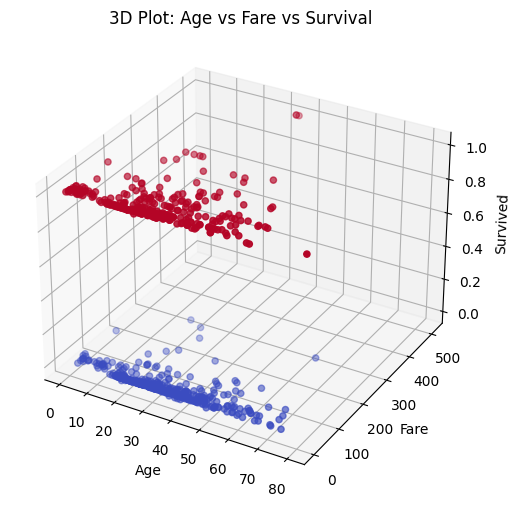

In [42]:
# 3D scatter plot to explore relationships between age, fare, and survival
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')           # 3D axis

subset = titanic[['age', 'fare', 'survived']].dropna()  # remove missing rows

# Plotting survival in color
sc = ax.scatter(subset['age'], subset['fare'], subset['survived'],
                c=subset['survived'], cmap='coolwarm')

ax.set_title('3D Plot: Age vs Fare vs Survival')
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.set_zlabel('Survived')
plt.show()

## Hexbin Plot: Age vs Fare


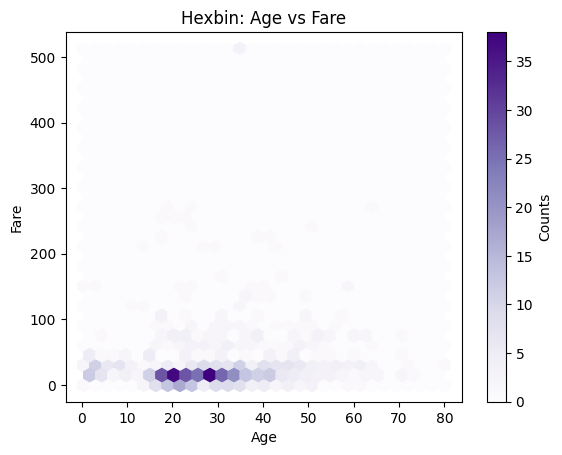

In [43]:
# Hexbin plots are great for visualizing density in scatter data
subset = titanic[['age', 'fare']].dropna()

plt.hexbin(subset['age'], subset['fare'], 
           gridsize=30,                            # control resolution
           cmap='Purples')                         # color theme
plt.colorbar(label='Counts')                       # color legend
plt.title('Hexbin: Age vs Fare')                   # chart title
plt.xlabel('Age')                                  # x-axis label
plt.ylabel('Fare')                                 # y-axis label
plt.show()